In [171]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [132]:
# Define image dimensions and batch size
FAST_RUN = True
IMAGE_WIDTH =128
IMAGE_HEIGHT =128
IMAGE_SIZE =(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGES_CHANNELS =3
batch_size = 32  


In [133]:
# Define paths to train and test data directories
train_dir = '/Users/surajojha/Downloads/Cat_Dog_Classifiyer/train/'
test_dir = '/Users/surajojha/Downloads/Cat_Dog_Classifiyer/test/'


In [134]:
# Get the list of filenames in the train and test directories
train_filenames = os.listdir(train_dir)
test_filenames = os.listdir(test_dir)


In [135]:
# Initialize lists to store categories for train and test images
train_categories = []
test_categories = []



In [260]:
# Iterate through train filenames and assign categories
categories_train = []
for filename in train_filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories_train.append('cat')  # Append 'cat' as a string
    else:
        categories_train.append('dog')  # Append 'dog' as a string

categories_test = []
for filename in test_filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories_test.append('cat')  # Append 'cat' as a string
    else:
        categories_test.append('dog')  # Append 'dog' as a string


In [261]:
# Convert class labels to strings
categories_train = [str(label) for label in categories_train]
categories_test = [str(label) for label in categories_test]

# Check if class labels are already strings
if not all(isinstance(label, str) for label in categories_train):
    categories_train = [str(label) for label in categories_train]

if not all(isinstance(label, str) for label in categories_test):
    categories_test = [str(label) for label in categories_test]

In [262]:
# Create DataFrames for train and test data
train_df = pd.DataFrame({
    'filenames': train_filenames,
    'category': categories_train
})


In [263]:
test_df = pd.DataFrame({
    'filenames': test_filenames,
    'category': categories_test
})

In [142]:
print(test_df['category'].unique())

['dog']


<Axes: xlabel='category'>

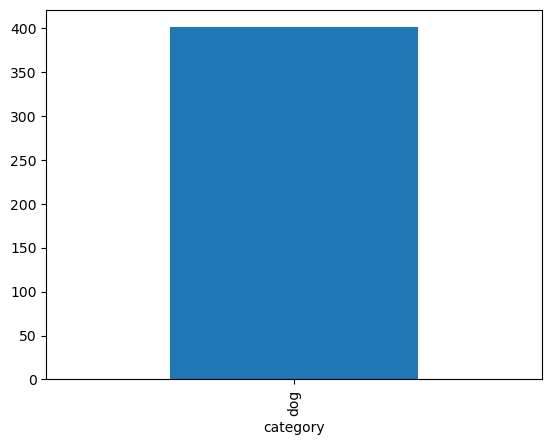

In [143]:
test_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

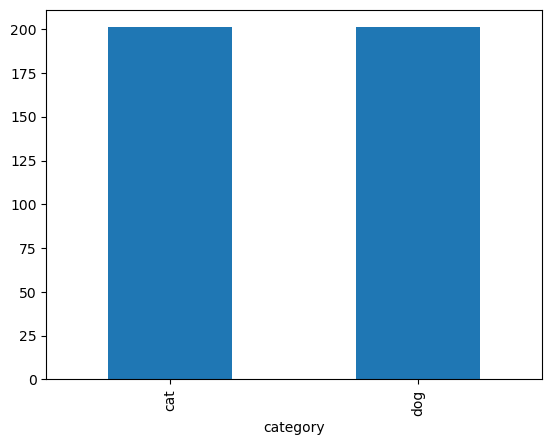

In [144]:
train_df['category'].value_counts().plot.bar()

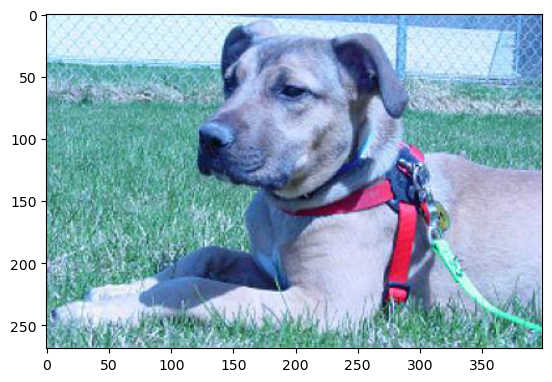

In [145]:
# Check sample train image
sample_train_filename = random.choice(train_filenames)
sample_train_image = load_img(os.path.join(train_dir, sample_train_filename))
plt.imshow(sample_train_image)
plt.show()


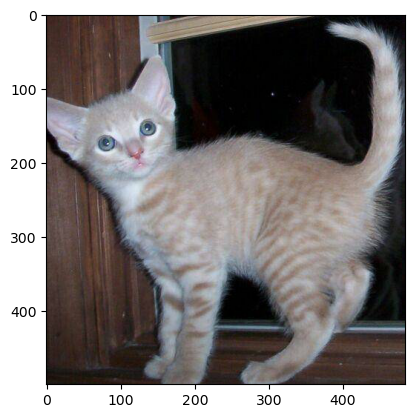

In [146]:
# Check sample test image
sample_test_filename = random.choice(test_filenames)
sample_test_image = load_img(os.path.join(test_dir, sample_test_filename))
plt.imshow(sample_test_image)
plt.show()

In [265]:
# Step 2: Defining the convolutional neural network architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization 

# Define the model architecture
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGES_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())


# Add fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
                  
model.add(Dense(2, activation='softmax'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/Users/surajojha/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_92 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_85 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_86 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [201]:
#callbacks
#early stop

'''earlystop = EarlyStopping(monitor = 'val_accuracy', patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                 patience = 2,
                                 varbose = 1,
                                 factor = 0.5,
                                 min_lr = 0.00001
                                )
callbacks = [earlystop,learning_rate_reduction]'''

In [266]:
# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)


In [202]:
train_df['category']= train_df['category'].replace({0:'cat', 1:'dog'})

In [215]:
df_train, validation_train = train_test_split(train_df, test_size = 0.20, random_state = 42)
df_train

,filenames,category
18,dog.23.jpg,dog
203,cat.100.jpg,cat
351,dog.150.jpg,dog
275,cat.136.jpg,cat
63,dog.160.jpg,dog
...,...,...
71,dog.200.jpg,dog
106,cat.104.jpg,cat
270,cat.75.jpg,cat
348,cat.193.jpg,cat


In [203]:
test_df['category']= test_df['category'].replace({0:'cat', 1:'dog'})

In [217]:
df_test, validation_test = train_test_split(test_df, test_size = 0.20, random_state = 42)
df_test

,filenames,category
18,177.jpg,dog
203,269.jpg,dog
351,232.jpg,dog
275,382.jpg,dog
63,398.jpg,dog
...,...,...
71,198.jpg,dog
106,262.jpg,dog
270,194.jpg,dog
348,347.jpg,dog


In [219]:
df_train = df_train.reset_index(drop = True)
validation_train = validation_train.reset_index(drop = True)  

In [221]:
df_train

,filenames,category
0,cat.6.jpg,cat
1,cat.198.jpg,cat
2,dog.167.jpg,dog
3,dog.173.jpg,dog
4,dog.36.jpg,dog
...,...,...
397,dog.156.jpg,dog
398,dog.142.jpg,dog
399,cat.195.jpg,cat
400,cat.181.jpg,cat


In [223]:
validation_train.shape

(81, 2)

In [220]:
df_test = df_test.reset_index(drop = True)
validation_test = validation_test.reset_index(drop = True)

In [222]:
df_test


,filenames,category
0,177.jpg,dog
1,269.jpg,dog
2,232.jpg,dog
3,382.jpg,dog
4,398.jpg,dog
...,...,...
315,198.jpg,dog
316,262.jpg,dog
317,194.jpg,dog
318,347.jpg,dog


In [225]:
validation_test.shape

(81, 2)

In [227]:
total_train = df_train.shape[0]
total_validate = validation_train.shape[0]
batch_size=15

In [228]:
total_test = df_test.shape[0]
total_validate = validation_test.shape[0]
batch_size=15

In [229]:
#training Generator
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1)

In [230]:
#training Generator
test_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1)

In [231]:
# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(
    df_train, 
    train_dir,
    x_col='filenames',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size)

Found 402 validated image filenames belonging to 2 classes.


In [274]:
train_validation_datagen = ImageDataGenerator(rescale=1./255)
train_validation_generator = train_validation_datagen.flow_from_dataframe(
    validation_train,  # Assuming validate_df contains validation data
    train_dir,    # Directory containing training images
    x_col='filenames',      # Column name in validate_df that contains the filenames
    y_col='category',       # Column name in validate_df that contains the labels
    target_size=IMAGE_SIZE, # Target size of the images (tuple)
    class_mode='categorical', # Since you're using categorical labels
    batch_size=batch_size   # Batch size
)


Found 81 validated image filenames belonging to 2 classes.


In [280]:
# Flow validation images in batches using test_datagen generator
test_generator = test_datagen.flow_from_dataframe(
    df_test, 
    test_dir,
    x_col='filenames',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)


Found 319 validated image filenames belonging to 1 classes.


/Users/surajojha/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filenames". These filename(s) will be ignored.
  warnings.warn(


In [275]:
test_validation_datagen = ImageDataGenerator(rescale=1./255)
test_validation_generator = test_validation_datagen.flow_from_dataframe(
    validation_test,  # Assuming validate_df contains validation data
    test_dir,     # Directory containing test images
    x_col='filenames',      # Column name in validate_df that contains the filenames
    y_col='category',       # Column name in validate_df that contains the labels
    target_size=IMAGE_SIZE, # Target size of the images (tuple)
    class_mode='categorical', # Since you're using categorical labels
    batch_size=batch_size   # Batch size
)

Found 81 validated image filenames belonging to 1 classes.


In [277]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=20,
    validation_data=train_validation_generator,
    validation_steps=train_validation_generator.n // batch_size,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.6078 - loss: 1.1823 - val_accuracy: 0.5333 - val_loss: 1.3712 - learning_rate: 0.0010
Epoch 2/20


/Users/surajojha/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6000 - loss: 0.4079 - val_accuracy: 0.3333 - val_loss: 0.4775 - learning_rate: 0.0010
Epoch 3/20


2024-04-04 23:45:18.020269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/surajojha/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-04 23:45:18.045022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.6240 - loss: 0.9380 - val_accuracy: 0.5867 - val_loss: 0.6885 - learning_rate: 0.0010
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5017 - val_accuracy: 0.6667 - val_loss: 0.2848 - learning_rate: 0.0010
Epoch 5/20


2024-04-04 23:45:23.112558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-04 23:45:23.131803: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.6655 - loss: 0.7673 - val_accuracy: 0.5067 - val_loss: 1.2203 - learning_rate: 0.0010
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6000 - loss: 0.4046 - val_accuracy: 0.6667 - val_loss: 0.4982 - learning_rate: 0.0010
Epoch 7/20


2024-04-04 23:45:28.152029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-04 23:45:28.172200: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.6606 - loss: 0.6926 - val_accuracy: 0.5200 - val_loss: 2.4391 - learning_rate: 2.0000e-04
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6000 - loss: 0.3388 - val_accuracy: 0.5000 - val_loss: 1.4317 - learning_rate: 2.0000e-04
Epoch 9/20


2024-04-04 23:45:33.293250: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-04 23:45:33.313318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.7063 - loss: 0.6236 - val_accuracy: 0.5067 - val_loss: 3.1993 - learning_rate: 4.0000e-05
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 4.


In [278]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

# Save the model
model.save("cat_dog_classifier_model.h5")

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7447 - loss: 1.5194


Test Accuracy: 0.702194333076477


In [302]:
from keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model("cat_dog_classifier_model.h5")

# Load and preprocess the test image
test_image_path = "/Users/surajojha/Downloads/Cat_Dog_Classifiyer/test/3.jpg"  # Replace this with the path to your test image
img = image.load_img(test_image_path, target_size=IMAGE_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize the image array

# Make predictions using the loaded model
predictions = model.predict(img_array)

# Interpret the predictions
if predictions[0][0] > predictions[0][1]:
    print("Prediction: Cat")
else:
    print("Prediction: Dog")

# Print the probabilities of each class
print("Probability of being a Cat:", predictions[0][0])
print("Probability of being a Dog:", predictions[0][1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: Cat
Probability of being a Cat: 0.6405524
Probability of being a Dog: 0.35944763


In [301]:
import os
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

# Load the trained model
model = load_model("cat_dog_classifier_model.h5")

# Define the folder containing the images
folder_path = "/Users/surajojha/Downloads/Cat_Dog_Classifiyer/test/"  # Replace this with the path to your folder containing images

# Iterate through all image files in the folder
for i in range(1, len(os.listdir(folder_path)) + 1):
    filename = f"{i}.jpg"  # Assuming filenames start from 1.jpg
    if os.path.exists(os.path.join(folder_path, filename)):
        # Load and preprocess the image
        img_path = os.path.join(folder_path, filename)
        img = image.load_img(img_path, target_size=IMAGE_SIZE)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.  # Normalize the image array

        # Make predictions using the loaded model
        predictions = model.predict(img_array)

        # Interpret the predictions and print to console
        if predictions[0][0] > predictions[0][1]:
            prediction_str = f"Cat, Probability: {predictions[0][0]}"
        else:
            prediction_str = f"Dog, Probability: {predictions[0][1]}"

        print(f"{filename}: {prediction_str}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1.jpg: Cat, Probability: 0.527057945728302
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2.jpg: Dog, Probability: 0.6010488271713257
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3.jpg: Cat, Probability: 0.6405524015426636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4.jpg: Dog, Probability: 0.7668836116790771
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5.jpg: Cat, Probability: 0.7515226006507874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6.jpg: Cat, Probability: 0.6018108129501343
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
7.jpg: Cat, Probability: 0.7562970519065857
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
8.jpg: Cat, Probability: 0.7374200820922852
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
9.jpg: Cat, Probability: 0.8355966806411743
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
10.jpg: Dog, Probability: 0.5463294386863708
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
11.jpg: Cat, Probability: 0.7396990656852722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
12.jpg: Cat, Probability: 0.5748783946037292
1/1 ━━━━━━━━━━